In [1]:
import numpy as np
import torch
from ppflows.distributions import DropoutBoxUniform, DropoutBoxBase, DropoutBoxBeta

from matplotlib import pyplot as plt

In [2]:
def dec2bin(x, bits):
    # mask = 2 ** torch.arange(bits).to(x.device, x.dtype)
    mask = 2 ** torch.arange(bits - 1, -1, -1).to(x.device)
    return x.unsqueeze(-1).bitwise_and(mask).ne(0).float()


def bin2dec(b, bits):
    mask = 2 ** torch.arange(bits - 1, -1, -1).to(b.device)
    return torch.sum(mask * b, -1)

In [3]:
p = 0.7
n = 1000000
d = 2
dropout_mask = torch.Tensor(np.random.binomial(1, p, (n, d))).bool()
data = torch.rand(n, d)
data[dropout_mask] = -1

In [4]:
dropout_box = DropoutBoxBeta(d)

In [5]:
for i in range(int(n/10)):
    dropout_box.train(data[i*10:(i+1)*10])
dropout_box.finalize_training()

In [6]:
samples = dropout_box.sample(n)

In [7]:
with torch.no_grad():
    log_probs = dropout_box.log_prob(samples)

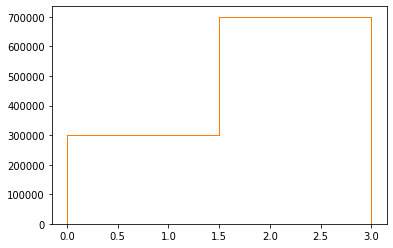

In [8]:
# Do the dropout rates match up?
plt.hist(bin2dec(data < 0, d).numpy(), bins=2**d, histtype='step')
plt.hist(bin2dec(samples < 0, d).numpy(), bins=2**d, histtype='step')
plt.show()

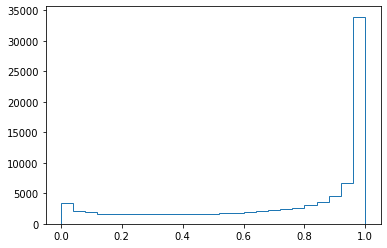

In [14]:
# Do the conditional likelihoods match up?
target = 0
mask = bin2dec(samples < 0, d) == target
samples_target = samples[mask]
log_probs_target = log_probs[mask]
#plt.hist(samples_target.numpy()[:,0], weights=1/np.exp(log_probs_target.numpy()), bins=25, histtype='step')
plt.hist(samples_target.numpy()[:,0], bins=25, histtype='step')
plt.show()